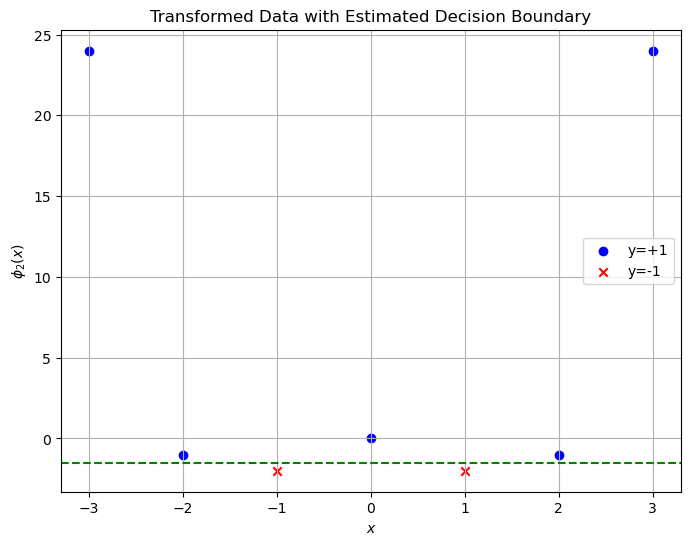

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Original data points
x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([1, 1, -1, 1, -1, 1, 1])

# Transformation function
def phi(x):
    return np.array([x, (-31/12)*x**2 + (7/12)*x**4])

# Apply transformation
transformed_data = np.array([phi(xi) for xi in x])

# Plotting
plt.figure(figsize=(8, 6))
for i, label in enumerate(y):
    if label == 1:
        plt.scatter(transformed_data[i, 0], transformed_data[i, 1], color='blue', marker='o', label='y=+1' if i == 0 else "")
    else:
        plt.scatter(transformed_data[i, 0], transformed_data[i, 1], color='red', marker='x', label='y=-1' if i == 2 else "")
plt.axhline(y=-1.5, color='green', linestyle='--')

plt.xlabel('$x$')
plt.ylabel('$\phi_2(x)$')
plt.title('Transformed Data with Estimated Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


In [113]:
import torch
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm

from T3_P3_TestCases import test_forward_pass

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<br>
<br>

In [114]:
n, d = 3, 2

zeroes = torch.zeros(size=(n, d))
print(f'Zeroes:\n{zeroes}')

ones = torch.ones(size=(n, d))
print(f'\nOnes:\n{ones}')

rand = torch.randn(size=(n, d))
print(f'\nRandom:\n{rand}')


Zeroes:
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

Ones:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Random:
tensor([[-0.5942, -0.0747],
        [-0.3384,  0.0618],
        [-1.2513, -0.5449]])


In [115]:
height, width = 48, 64
images = torch.randn(size=(n, height, width))

print(f'Images shape:\t\t{images.shape}')
print(f'First image shape:\t{images[0].shape}')
print(f'Second image shape:\t{images[1].shape}')
print(f'Third image shape:\t{images[2].shape}')

Images shape:		torch.Size([3, 48, 64])
First image shape:	torch.Size([48, 64])
Second image shape:	torch.Size([48, 64])
Third image shape:	torch.Size([48, 64])


Flattened images shape:	torch.Size([3, 3072])


[]

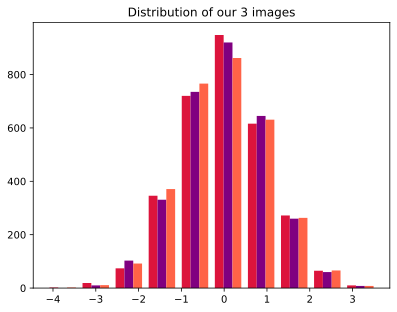

In [116]:
flattened_images = images.flatten(start_dim=1) # or images.reshape(n, -1)
print(f'Flattened images shape:\t{flattened_images.shape}')

plt.title(f'Distribution of our {n} images')
plt.hist(x=flattened_images, color=('crimson','purple','tomato'))
plt.plot()

## **2) Gradients**

In [117]:
f = lambda x: x**3       # define  f(x) = x^3
df = lambda x: 3 * x**2  # define ∇f(x) = 3*x^2 as sanity check

x = torch.tensor(1.0, requires_grad=True)  # initialize x = 1.0
x = torch.nn.Parameter(torch.tensor(1.0))  # this also initializes x = 1.0

y = f(x)      # calculate f(x)
y.backward()  # backpropogate and calculate gradient of f(x) at x = 1.0
print(f'Gradient of f(x) at x = {x}:\t{x.grad}')
print(f'Is this gradient right?:\t{x.grad == df(x)}')

Gradient of f(x) at x = Parameter containing:
tensor(1., requires_grad=True):	3.0
Is this gradient right?:	True


In [ ]:
x = torch.linspace(start=-2, end=2, steps=101, requires_grad=True)  # points spread across x-axis

y = f(x)            # calculate y for every point on x-axis
y.sum().backward()  # collapse y into single value in order to calculate the gradient at x value in parrelel

with torch.no_grad(): 
  plt.plot(x, y, label='$f(x)$', c='k')
  plt.plot(x, x.grad, label=r'$\nabla f(x)$', c='tomato')
plt.title('Plotting a function and its derivative')
plt.legend()
plt.show()


In [119]:
x = torch.nn.Parameter(torch.tensor(1.0))

y = f(x)
y.backward()
print(f'Gradient of f(x) at x = {x}:\t{x.grad}')

y = f(x)
y.backward()
print(f'Gradient of f(x) at x = {x}:\t{x.grad} (wrong)')

Gradient of f(x) at x = Parameter containing:
tensor(1., requires_grad=True):	3.0
Gradient of f(x) at x = Parameter containing:
tensor(1., requires_grad=True):	6.0 (wrong)


In [120]:
x = torch.nn.Parameter(torch.tensor(1.0))

y = f(x)
y.backward()
print(f'Gradient of f(x) at x = {x}:\t{x.grad}')

x.grad.zero_()
print(f'Gradient after zero=ing:\t{x.grad}')

y = f(x)
y.backward()
print(f'Gradient of f(x) at x = {x}:\t{x.grad} (right)')


Gradient of f(x) at x = Parameter containing:
tensor(1., requires_grad=True):	3.0
Gradient after zero=ing:	0.0
Gradient of f(x) at x = Parameter containing:
tensor(1., requires_grad=True):	3.0 (right)


## **3) MNIST Dataset**


In [121]:
def load_mnist(batch_size):
  trainset = torchvision.datasets.MNIST(root="./data", train=True, transform=torchvision.transforms.ToTensor(), download=True)
  testset = torchvision.datasets.MNIST(root="./data", train=False, transform=torchvision.transforms.ToTensor(), download=True)
  iter_from = lambda dataset: torch.utils.data.DataLoader(dataset, batch_size, shuffle=True, num_workers=0)
  return iter_from(trainset), iter_from(testset), trainset, testset

mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [122]:
train_iter, test_iter, train_set, test_set = load_mnist(batch_size=4)
print(f'Length of training dataset:\t{len(train_set)}')
print(f'Length of test dataset:\t\t{len(test_set)}')

x1, y1 = train_set[0]
y1_text = mnist_labels[y1]
print(f'First datapoint (x_1, y_1):\t(Image: shape {tuple(x1.shape)}, Label: {y1} ({y1_text})),')

Length of training dataset:	60000
Length of test dataset:		10000
First datapoint (x_1, y_1):	(Image: shape (1, 28, 28), Label: 5 (5)),


Shape of batch X:	 torch.Size([4, 1, 28, 28])
Shape of datapoint x_i:	 torch.Size([1, 28, 28])


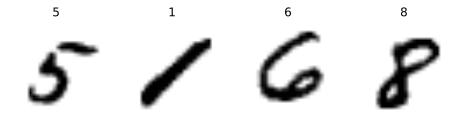

In [123]:
def plot_examples(X, y):
  batch_size = X.shape[0]
  _, axs = plt.subplots(1, batch_size, figsize=(batch_size*2, 2))
  for ax, img, y in zip(axs, X, y):
    ax.imshow(img[0], cmap='binary', interpolation='none')
    ax.set_title(mnist_labels[y]) 
    ax.axis('off')

  
for X, y in train_iter: 
  batch_shape = X.shape
  print(f'Shape of batch X:\t {batch_shape}')

  data_shape = X[0].shape
  print(f'Shape of datapoint x_i:\t {data_shape}')

  plot_examples(X, y)
  break  # break since it would take 60000/4 = 15000 iterations to finish iterating

In [188]:
n_inputs = (28*28)
n_hiddens = 256
n_outputs = 10

W1 = torch .nn. Parameter (torch.randn(size=(n_inputs, n_hiddens), requires_grad=True) * 0.01)
b1 = torch .nn. Parameter (torch.randn(n_hiddens, requires_grad=True))
W2 = torch .nn. Parameter (torch.randn(size=(n_hiddens, n_outputs), requires_grad=True) * 0.01)
b2 = torch .nn. Parameter (torch.randn(n_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

the ReLU function: $$\operatorname{ReLU}(x) = \max(0, x)$$
the softmax function: $$\operatorname{softmax}(\mathbf X)_{ij} = \frac{\exp(\mathbf X_{ij})}{\sum_k \exp \mathbf X_{ik})}.$$

In [189]:
def relu(x):
  return torch.clamp(x, min=0)

def softmax(X): 
  # shifted_X = X - torch.max(X, dim=1, keepdim=True)[0]
  # e_X = torch.exp(shifted_X)
  # out = e_X / torch.sum(e_X, dim=1, keepdim=True)
  # return out
  e_X = torch .exp(X - torch .max(X, dim =1, keepdim = True ). values )
  return e_X / torch .sum (e_X , dim =1, keepdim = True )


In [190]:
def net(X):  
  Xf = X.flatten(start_dim=1)

  H = relu(Xf @ W1 + b1)

  O = softmax(H @ W2 + b2)

  return O

In [191]:
test_forward_pass(net)

Forward pass test passed!


## **5) Training a neural network**



In [192]:
def cross_entropy(y_hat, y):
  return -torch.log (y_hat[torch.arange (y_hat.shape[0]) ,y])
def sgd(params, lr=0.1):
  with torch.no_grad ():
    for param in params :
      param.sub_(lr * param.grad)
      param.grad.zero_()


In [193]:
def train(net, params, train_iter, loss_func=cross_entropy, updater=sgd):
  for epoch in range(epochs):
    for X, y in train_iter:
      y_hat = net(X)
      loss = loss_func(y_hat, y).mean()
      loss.backward(retain_graph=True)
      updater(params, lr)

In [194]:
epochs = 10
batch_size = 128
lr = 0.1
train_iter, test_iter, _, _ = load_mnist(batch_size=batch_size)


def accuracy(y_hat, y):
  with torch.no_grad():
    y_labels = y_hat.argmax(axis=1)
    correct = y_labels == y
    return correct.sum() / correct.numel()


def train(net, params, train_iter, test_iter, loss, updater):
  train_losses, train_accs = [], []
  test_losses, test_accs = [], []
  
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = 0.0, 0.0
    trials = 0

    for X, y in train_iter:
      trials += 1
      y_hat = net(X)
      l = loss(y_hat, y).mean()
      acc = accuracy(y_hat, y)

      l.backward(retain_graph=True)
      for param in params:
        print(param.grad)
      updater(params, lr)

      train_loss += l
      train_acc += acc

    train_losses.append(train_loss.item() / trials)
    train_accs.append(train_acc.item() / trials)

    test_loss, test_acc = 0.0, 0.0
    trials = 0

    y_pred = []
    y_true = []

    for X, y in test_iter:
      trials += 1
      with torch.no_grad():
        y_hat = net(X)

        # Recording for confusion matrix
        if epoch == epochs-1:
          y_pred += y_hat.argmax(axis=1)
          y_true += y
        
        l = loss(y_hat, y).mean()
        acc = accuracy(y_hat, y)

        test_loss += l
        test_acc += acc
    
    test_losses.append(test_loss.item() / trials)
    test_accs.append(test_acc.item() / trials)
  
  return train_losses, train_accs, test_losses, test_accs, y_pred, y_true

In [ ]:
train_losses, train_accs, test_losses, test_accs, y_pred, y_true = train(net, params, train_iter, test_iter, loss=cross_entropy, updater=sgd)

[2.7162409215085286, 2.716227647338086, 2.7161828795475746, 2.7163343612573296, 2.716138372034915, 2.716194852328758, 2.716316922641258, 2.716287771521855, 2.7161693450992805, 2.716206304554238]


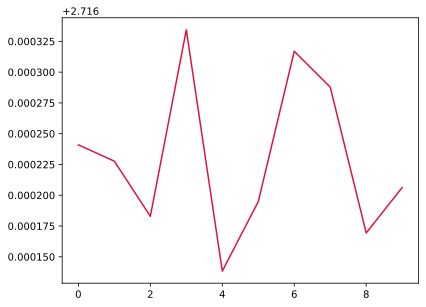

In [184]:
print(train_losses)
plt.plot(train_losses, c='crimson', label='train loss')

In [ ]:
def relu(x):
  
  return torch.clamp(x, min=0)

def softmax(X):
  exps = torch.exp(X)
  return exps/torch.sum(exps, dim=1, keepdim=True)


# Out of Distribution (OOD) Analysis

In [ ]:
trainset = torchvision.datasets.MNIST(root="./data", train=True, transform=torchvision.transforms.ToTensor(), download=True)
testset = torchvision.datasets.MNIST(root="./data", train=False, transform=torchvision.transforms.ToTensor(), download=True)

In [ ]:
# Constructing our train data to be full of just 1's and 6's
new_train_set = []
for X, y in trainset:
    if y == 1 or y == 6:
        new_train_set.append((X, y))

# Constructing our in-distribution test data to be full of just 1's and 6's
in_test_set = []
for X, y in testset:
    if y == 1 or y == 6:
        in_test_set.append((X, y))

# Constructing our out-of-distribution test data to be full of just 3's
out_test_set = []
for X, y in testset:
    if y == 3:
        out_test_set.append((X, y))

In [ ]:
iter_from = lambda dataset: torch.utils.data.DataLoader(dataset, batch_size, shuffle=True, num_workers=2)

train_iter = iter_from(new_train_set)
in_test_iter = iter_from(in_test_set)
out_test_iter = iter_from(out_test_set)

In [ ]:
W1 = torch.randn(n_inputs, n_hiddens, requires_grad=True) * 0.01 # matrix applying linear transformation
b1 = torch.zeros(n_hiddens, requires_grad=True) # additive bias term
W2 = torch.randn(n_hiddens, n_outputs, requires_grad=True) * 0.01 # matrix applying linear transformation
b2 = torch.zeros(n_outputs, requires_grad=True) # additive bias term

params = [W1, b1, W2, b2]

In [ ]:
def new_train_test_function(net, params, train_iter, in_test, out_test, loss, updater):
  for _ in tqdm(range(epochs)):
    trials = 0

    for X, y in train_iter:
      trials += 1
      y_hat = net(X)
      l = loss(y_hat, y).mean()

      l.backward()
      updater(params, lr)
  
  # In distribution
  test_acc = 0.0
  trials = 0
  for X, y in in_test:
    trials += 1
    with torch.no_grad():
      y_hat = net(X)
      l = loss(y_hat, y).mean()
      acc = accuracy(y_hat, y)
      test_acc += acc
  
  print("Test Accuracy (In Distribution): " + str(test_acc.item() / trials))
  
  # Out of distribution
  test_acc = 0.0
  trials = 0
  for X, y in out_test:
    trials += 1
    with torch.no_grad():
      y_hat = net(X)
      l = loss(y_hat, y).mean()
      acc = accuracy(y_hat, y)

      test_acc += acc
  
  print("Test Accuracy (Out of Distribution): " + str(test_acc.item() / trials))